In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv('petrol_consumption.csv')
df.shape

In [3]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.73,1.07,5.00,7.00,7.50,9.00,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


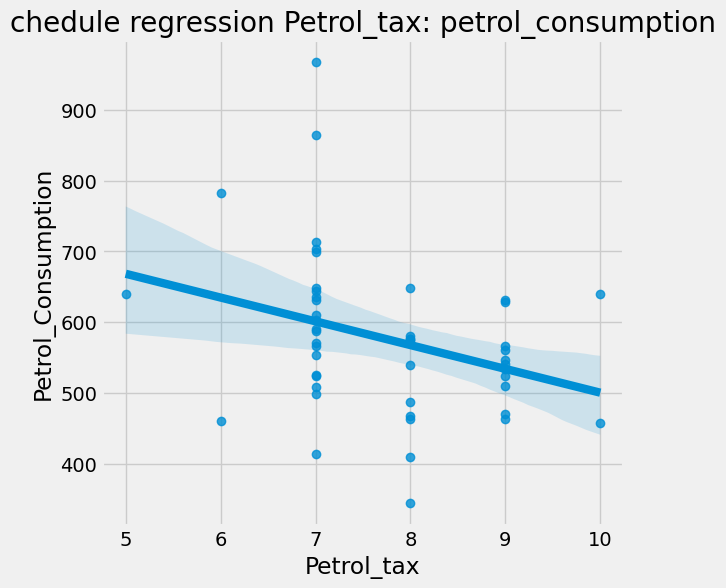

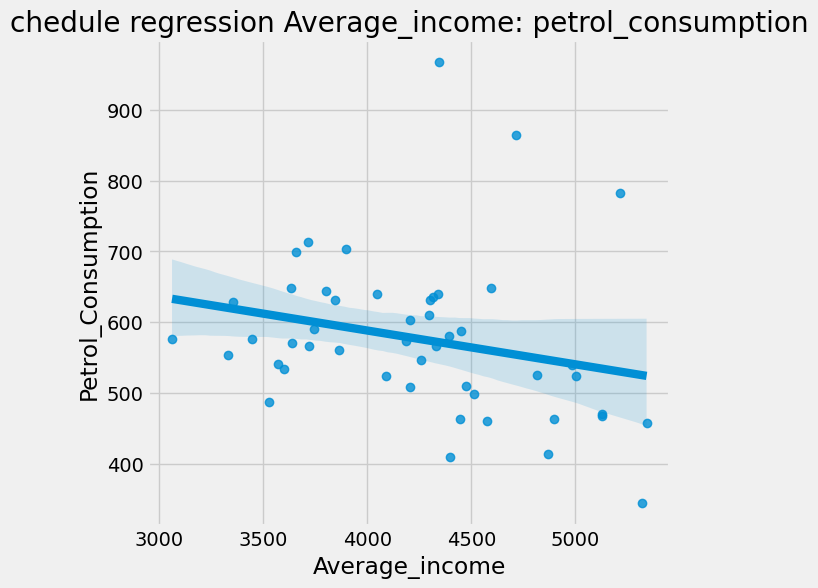

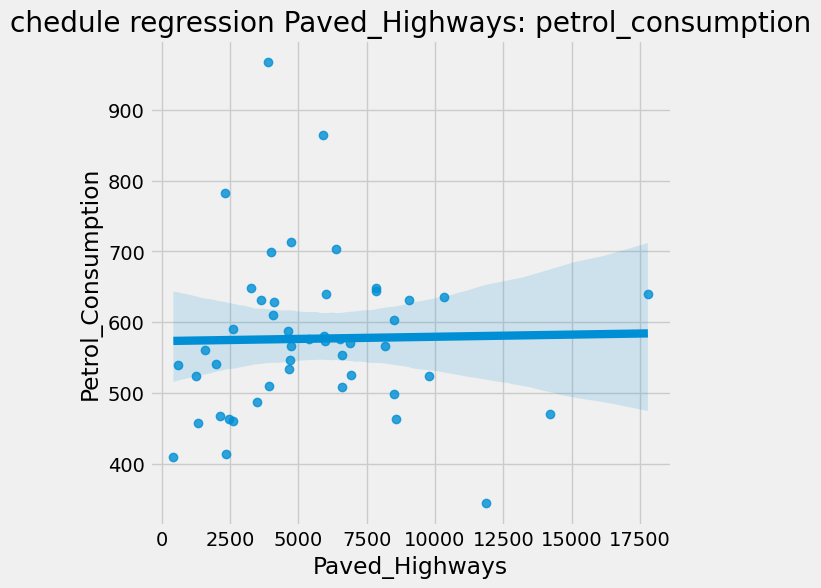

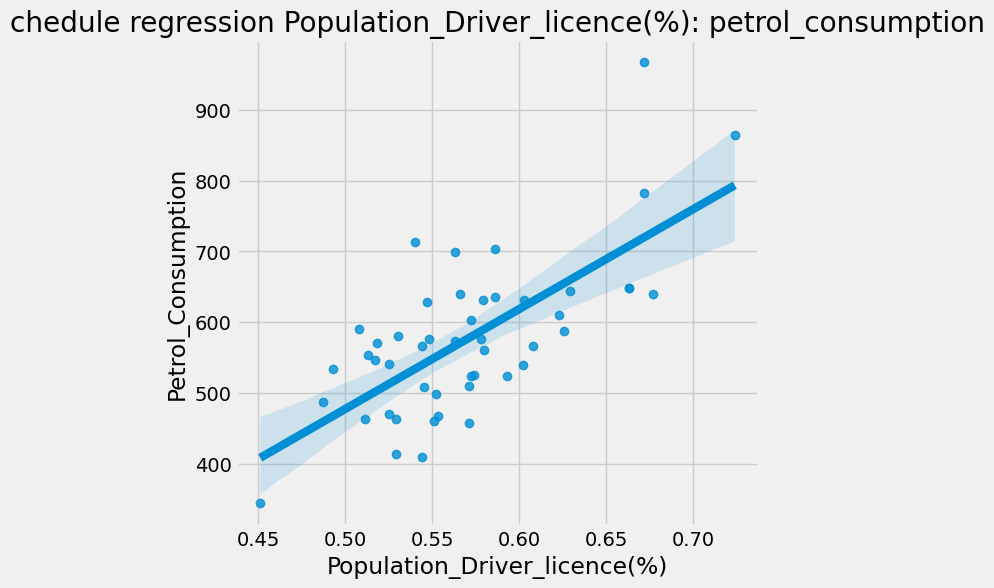

In [4]:
var = []
for i in df.iloc[:,:-1]:
    var.append(i)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(6, 6))
    sns.regplot(x=i, y=df.iloc[:,-1:], data=df).set(title=f'chedule regression {i}: petrol_consumption')
    

In [5]:
cor_df = df.corr()
cor_df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,-0.039889,-0.306876,-0.214551,-0.320173
Average_income,-0.039889,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.306876,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.214551,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.320173,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Pirson_corr')]

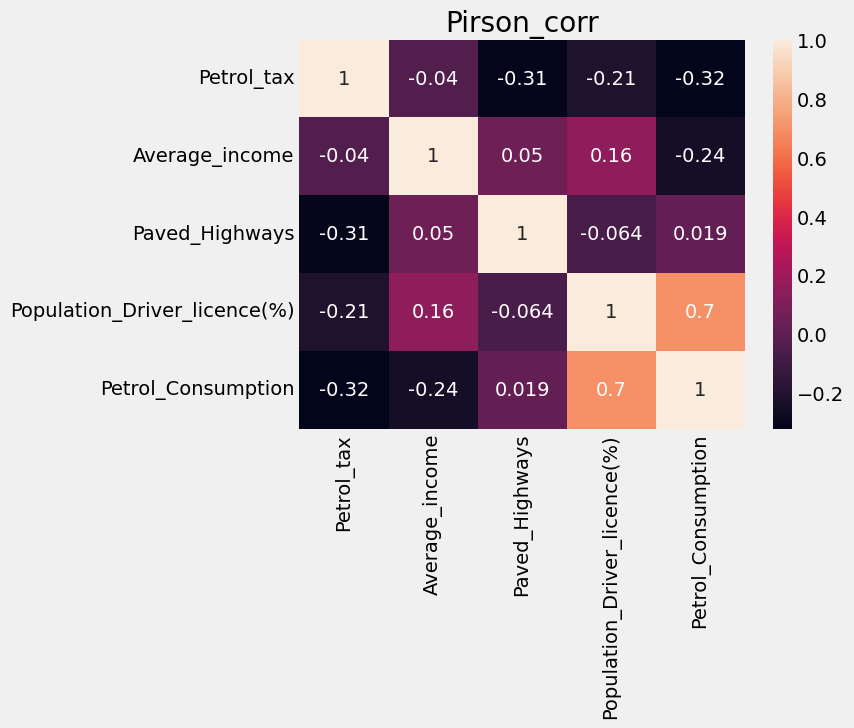

In [6]:
sns.heatmap(cor_df, annot=True).set(title='Pirson_corr')

In [11]:
y = df.iloc[:,-1:]
x = df.iloc[:,:-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
print(f'beta_0: {model.intercept_}')
print(f'beta_n: {model.coef_}')

beta_0: [261.53765623]
beta_n: [[-2.72369956e+01 -6.31540971e-02 -2.03821347e-03  1.42809361e+03]]


In [48]:
y_pred = model.predict(x_test)

In [65]:
mae = sum(abs(y_test.values - y_pred)) / len(x_test)
mse = sum(abs(y_test.values - y_pred)**2) / len(x_test)

print(np.round(mae, 2))
print(np.round(mse, 2))

[68.19]
[5564.76]


In [67]:
print(model.score(x_train, y_train))

0.6745506993293314


In [68]:
print(model.score(x_test, y_test))

0.20127361804839716


----------------------------------

In [167]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, LeaveOneOut, LeavePOut

In [153]:

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


In [166]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


In [162]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


In [169]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


--------------------------------

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

x, y = datasets.load_iris(return_X_y=True)

print(x.shape,  y.shape)

(150, 4) (150,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4)

print(X_train.shape, X_test.shape)
print()
print(y_train.shape,  y_test.shape)

(90, 4) (60, 4)

(90,) (60,)


In [21]:
rfc = RandomForestClassifier()

scores = cross_val_score(rfc, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [22]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.02


In [23]:
from sklearn import metrics
scores = cross_val_score(rfc, x, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 0.96658312, 0.93265993, 0.96658312, 1.        ])

In [25]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [44]:
from sklearn.model_selection import ShuffleSplit

n_samples = x.shape[0]

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

cross_val_score(clf, x, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

In [49]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(x)


cross_val_score(clf, x, y, cv=custom_cv)

array([1.        , 0.97333333])

-------------------------------------

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']

clf = svm.SVC(kernel='linear', C=1, random_state=0)

scores = cross_validate(clf, x, y, scoring=scoring)

print(sorted(scores.keys()))
scores['test_recall_macro']

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [77]:
from sklearn.model_selection import KFold

X = np.arange(1, 5)

kf = KFold(n_splits=2)

for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [73]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])

X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]


----------------------------------

In [304]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn import ensemble, tree
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv('Students.csv')

x, y = np.array(df.iloc[:,0]).reshape(-1, 1), np.array(df.iloc[:,1])

In [305]:
model_l = LinearRegression()
model_l.fit(x, y)

print(f' coef_:                 {model_l.coef_}')
print(f'.intercept_             {model_l.intercept_}')
print(f'.score(x, y)            {model_l.score(x, y)}')

 coef_:                 [9.50669495]
.intercept_             4.326793053161886
.score(x, y)            0.8884464052366214


In [306]:
y_pred = model_l.predict(x)

In [307]:
print(f' mae:   {sum(np.abs(y - y_pred)) / len(x)}')
print(f' mse:   {sum(np.abs(y - y_pred)**2) / len(x)}')
print(f' rmse:  {sum(np.abs(y - y_pred)**2 / len(x))**0.5}')

 mae:   6.218910247911969
 mse:   68.47712952406204
 rmse:  8.275090907298967


-------------------------

In [309]:
K_f = KFold(n_splits = 5)

score = cross_val_score(model_l, x, y, cv=kf, scoring="neg_mean_squared_error")

print(score)

[-96.46240815 -87.94503716 -29.39728731]


In [310]:
def rmse(score):
    rmse = np.sqrt(-score)
    return f'rmse= {"{:.2f}".format(rmse)}'



print(f'Scores for each fold: {score}')

print(RMSE(score.mean()))

print(-score.mean())

Scores for each fold: [-96.46240815 -87.94503716 -29.39728731]
8.442052132481741
71.26824420753952


--------------------------------

In [311]:
model_random_fr = ensemble.RandomForestRegressor(random_state=42)

In [312]:
score2 = cross_val_score(model_random_fr, x, y, cv=kf, scoring="neg_mean_squared_error")

print(f'Scores for each fold: {score2}')

print(RMSE(score2.mean()))

print(-score2.mean())

Scores for each fold: [-114.3301446  -144.07717262  -47.30319932]
10.094726619147467
101.90350551532447


--------------------------------

In [313]:
model_r_f = tree.DecisionTreeRegressor(random_state=42)

scores3 = cross_val_score(model_r_f, x, y, cv=K_f, scoring='neg_mean_squared_error')

print(scores3)

print(RMSE(scores3.mean()))

[-188.   -122.6  -229.65  -90.2  -108.2 ]
12.154423063230933


---------------------------------

In [66]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,  cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import svm

x, y = load_iris(return_X_y=True)

In [14]:
clf = DecisionTreeClassifier(random_state=42)

k_fold = KFold(n_splits=5)

scores = cross_val_score(clf, x, y, cv=k_fold)

In [65]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


---------------------

In [57]:
X = np.random.randint(1, 15, 50)
Y = np.random.randint(0, 3, 50)

In [58]:
clf2 = DecisionTreeClassifier(random_state=12)
clf2.fit(X.reshape(-1, 1), Y)

DecisionTreeClassifier(random_state=12)

In [59]:
y_predict = clf2.predict(X.reshape(-1, 1))

print(accuracy_score(y_predict, Y))

0.62


In [60]:
y_predict

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 2])

--------------------------------

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import recall_score, make_scorer

x, y = load_iris(return_X_y=True)

print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(90, 4) (90,)
(60, 4) (60,)


In [3]:
model_svc = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

print(model_svc.score(x_test, y_test))

print(model_svc)

0.9666666666666667
SVC(C=1, kernel='linear')


------------------------------------

In [5]:
model_svc2 = svm.SVC(kernel='linear', C=1, random_state=42)


score = cross_val_score(model_svc2, x, y, cv=5, scoring='f1_macro')


for i in score:
    print("Score: %0.2f " % i)

print("Score.mean: %0.2f " % score.mean())
print("Score.std:  %0.2f " % score.std())

Score: 0.97 
Score: 1.00 
Score: 0.97 
Score: 0.97 
Score: 1.00 
Score.mean: 0.98 
Score.std:  0.02 


--------------

In [6]:

n_samples = x.shape[0]
n_samples

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scor = cross_val_score(model_svc2, x, y, cv=cv)

for i in scor:
    print("Score: %0.2f " % i)
    
print("Score.mean: %0.2f " % scor.mean())
print("Score.std:  %0.2f " % scor.std())

Score: 0.98 
Score: 0.98 
Score: 1.00 
Score: 0.96 
Score: 1.00 
Score.mean: 0.98 
Score.std:  0.02 


----------------

In [7]:
def cus_cv_2fold(X):
    n = x.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1
        
cus = cus_cv_2fold(x)

cross_val_score(model_svc2, x, y, cv=cus)


array([1.        , 0.97333333])

-------------------------------

In [8]:
scoring = ['precision_macro', 'recall_macro']

clf = svm.SVC(kernel='linear', C=1, random_state=0)

scores = cross_validate(clf, x, y, scoring=scoring)

print(sorted(scores.keys()))

s = scores['test_recall_macro']

for i in s:
    print(" %0.2f " % i)

print("mean: %0.2f" % s.mean())
print("std:  %0.2f" % s.std())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
 0.97 
 1.00 
 0.97 
 0.97 
 1.00 
mean: 0.98
std:  0.02


-------------------------

In [9]:
scoring = {'prec_macro': 'precision_macro', 'rec_macro': make_scorer(recall_score, average='macro')}

scores = cross_validate(clf, x, y, scoring=scoring, cv=5, return_train_score=True)

print(sorted(scores.keys()))

s = scores['train_rec_macro']

for i in s:
    print("scores : %0.2f " % i)

print("mean %0.2f" % s.mean())
print("std  %0.2f " % s.std())

['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro', 'train_prec_macro', 'train_rec_macro']
scores : 0.97 
scores : 0.97 
scores : 0.99 
scores : 0.98 
scores : 0.98 
mean 0.98
std  0.01 


----------------

In [10]:
scores = cross_validate(clf, x, y, scoring='precision_macro', cv=5, return_estimator=True)

sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


X = ["a", "b", "c", "d"]

kf = KFold(n_splits=2)

for train, test in kf.split(X):
    print("%s %s" % (train, test))
    

[2 3] [0 1]
[0 1] [2 3]


array([0, 1])

In [70]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
Y = np.array([0, 1, 0, 1])

X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]

In [93]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])



rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=4)

for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]
[1 3] [0 2]
[0 2] [1 3]


In [149]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, make_scorer
warnings.filterwarnings('ignore')


df = pd.read_csv('Students.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,4.8,75
4,3.5,30


In [150]:

x = np.array(df['Hours']).reshape(-1, 1)
y = np.array(df['Scores'])

In [151]:
model_l = LinearRegression()
model_l.fit(x, y)

LinearRegression()

In [152]:
print(model_l.intercept_)
print(model_l.coef_)
print(model_l.score(x, y))

y_pred  = model_l.predict(x)

4.326793053161886
[9.50669495]
0.8884464052366214


In [153]:
mae = sum(abs(y - y_pred)) / len(x)
mse = sum(abs(y - y_pred)**2) / len(x)
rmse = mse**0.5

print(mae)
print(mse)
print(rmse)

6.218910247911969
68.47712952406204
8.275090907298967


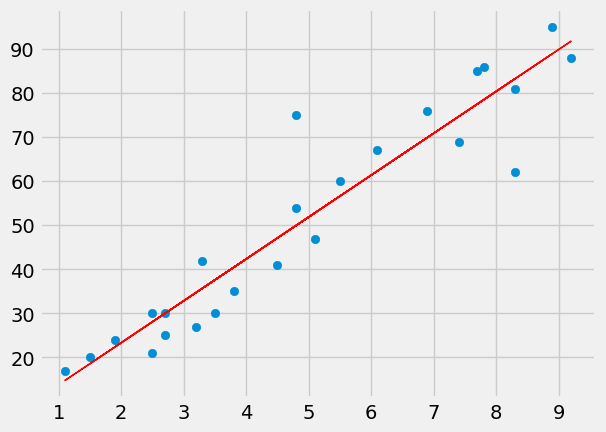

In [154]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y)
plt.plot(x, y_pred, c='red', linewidth=1)

---------

In [155]:
clf = KFold(n_splits=5)

model_l_cross = cross_val_score(model_l, x, y, cv=clf, scoring="neg_mean_squared_error")

n = 1
for i in model_l_cross:
    print( n, 'score: %0.2f' % i)
    n += 1
    
print(' mean : %0.2f' % model_l_cross.mean())
print(' std  : %0.2f' % model_l_cross.std())

print(np.sqrt(-model_l_cross.mean()))

1 score: -170.63
2 score: -13.69
3 score: -138.68
4 score: -21.30
5 score: -36.42
 mean : -76.14
 std  : 65.31
8.725895114036534


In [156]:
model_l_cross2 = cross_validate(model_l, x, y, cv=clf)

nums = 1
for i in model_l_cross2['test_score']:
    print( nums, 'score: %0.2f' % i)
    nums += 1
    
print(' mean : %0.2f' % model_l_cross2['test_score'].mean())
print(' std  : %0.2f' % model_l_cross2['test_score'].std())

1 score: 0.55
2 score: 0.98
3 score: 0.73
4 score: 0.97
5 score: 0.92
 mean : 0.83
 std  : 0.17


------------------

In [157]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

x, y = load_iris(return_X_y=True)

print(x.shape, y.shape)

(150, 4) (150,)


In [158]:
Y = np.random.randint(0, 4, 150)

In [159]:
model_dt_c = DecisionTreeClassifier(random_state=42) 
model_dt_c.fit(x, y)

DecisionTreeClassifier(random_state=42)

In [160]:
y_pred_tree = model_dt_c.predict(x)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [161]:
print(sum(abs(y - y_pred_tree)) / len(x))
print(sum(abs(y - y_pred_tree)**2) / len(x))
print(sum(abs(y - y_pred_tree)**2) / len(x)**0.5)

0.0
0.0
0.0


In [162]:
model_dt_c.score(x, y)

1.0

In [163]:
clf_Kfold = KFold(n_splits=5)

score_tree = cross_val_score(model_dt_c, x, y, cv=clf_Kfold)

for i in score_tree:
    print(' %0.2f' % i)
    
print(' mean(): %0.2f' % score_tree.mean())
print('  std(): %0.2f' % score_tree.std())

 1.00
 1.00
 0.83
 0.93
 0.80
 mean(): 0.91
  std(): 0.08


In [166]:
stratific_k = StratifiedKFold(n_splits=5)

score_tree2 = cross_val_score(model_dt_c, x, y, cv=stratific_k)


for i in score_tree2:
    print(' %0.2f' % i)
    
print(' mean(): %0.2f' % score_tree2.mean())
print('  std(): %0.2f' % score_tree2.std())

 0.97
 0.97
 0.90
 0.93
 1.00
 mean(): 0.95
  std(): 0.03


In [35]:
from sklearn.model_selection import LeavePOut, ShuffleSplit
import numpy as np
import time as tm

X = np.ones(4)
lpo = LeavePOut(p=2)

start = tm.time()

for train, test in lpo.split(X):
    print(train, test)
    
stop = tm.time()

print(stop - start)

[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]
0.0010001659393310547


In [38]:
from sklearn.model_selection import ShuffleSplit

X = np.arange(10)

ss = ShuffleSplit(n_splits=4, test_size=0.4, random_state=0)

for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[1 6 7 3 0 5] [2 8 4 9]
[9 8 0 6 7 4] [3 5 1 2]
[5 1 0 6 9 7] [2 3 8 4]
[7 5 8 0 3 4] [6 1 9 2]


In [80]:


X, Y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))


skf = StratifiedKFold(n_splits=3)

for train, test in skf.split(X, Y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(Y[train]), np.bincount(Y[test])))

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]


In [89]:
    
kf = KFold(n_splits=3)

for train, test in kf.split(X, Y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(Y[train]), np.bincount(y[test])))

train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


----------------------------------------

In [77]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np


df = pd.read_csv('Students.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,4.8,75
4,3.5,30


<AxesSubplot: xlabel='Hours', ylabel='Scores'>

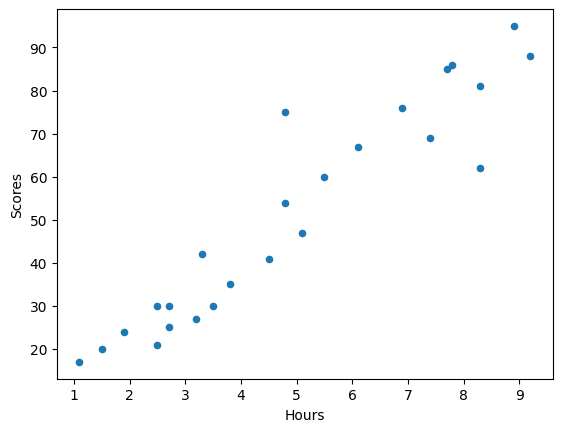

In [22]:
x = np.array(df.iloc[::,0])
y = np.array(df.iloc[::,1])

df.plot(x='Hours', y='Scores', kind='scatter')

In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=10)

  
score = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, cv= kf, scoring="neg_mean_squared_error")

n = 1
for i in score:
    print(f'Scores for each fold {n}: {np.sqrt(-i)}')
    n += 1
    
print(f'rmse: {score.mean()}')
print(f'std: {score.std()}')

Scores for each fold 1: 5.172981144725118
Scores for each fold 2: 7.453657931936287
Scores for each fold 3: 14.119061820186618
Scores for each fold 4: 15.926082287265377
Scores for each fold 5: 5.851954704026239
Scores for each fold 6: 6.801502775403395
Scores for each fold 7: 1.7819299253143306
Scores for each fold 8: 2.1490197576746604
Scores for each fold 9: 7.606964058838339
Scores for each fold 10: 7.295574240469717
rmse: -73.4695433923063
std: 79.63881289140778


---------------------------

In [50]:
score_Dec_tree = cross_val_score(DecisionTreeRegressor(), x.reshape(-1, 1), y, cv=kf, scoring="neg_mean_squared_error")

n1 = 1
for i in score_Dec_tree:
    print(f'Scores for each fold {n1}: {np.sqrt(-i)}')
    n1 += 1
    
print(f'rmse: {np.sqrt(-score_Dec_tree.mean())}')
print(f'std: {score_Dec_tree.std()}')

Scores for each fold 1: 13.419513155600443
Scores for each fold 2: 18.55846617225321
Scores for each fold 3: 13.403979508588733
Scores for each fold 4: 13.102162671355696
Scores for each fold 5: 5.744562646538029
Scores for each fold 6: 14.866068747318506
Scores for each fold 7: 13.892443989449804
Scores for each fold 8: 6.96419413859206
Scores for each fold 9: 8.06225774829855
Scores for each fold 10: 9.192388155425117
rmse: 12.332207155790618
std: 90.77747517969422


In [104]:
score_Extra = cross_val_score(ExtraTreeRegressor(), x.reshape(-1, 1), y, cv=kf, scoring='neg_mean_squared_error')

minim = []
n2 = 1
for i in score_Extra: 
    print(f'rmse: {n2} {np.sqrt(-i)}')
    n2 += 1
   
print(f'rmse.mean(): {np.sqrt(-score_Extra.mean())}')
print(f'std: {score_Extra.std()}')

rmse: 1 12.466622103307161
rmse: 2 18.55846617225321
rmse: 3 11.818065267490557
rmse: 4 13.503086067019396
rmse: 5 5.744562646538029
rmse: 6 14.866068747318506
rmse: 7 13.892443989449804
rmse: 8 6.708203932499369
rmse: 9 17.793959649274246
rmse: 10 5.0
rmse.mean(): 12.866461570040666
std: 105.61986747885078


In [107]:
KF = KFold(n_splits=10, shuffle=True, random_state=2)

In [108]:
pred_score = cross_val_predict(LinearRegression(), x.reshape(-1, 1), y, cv=KF)

pred_score

array([28.37483083, 53.28326309, 35.13092787, 48.99330197, 38.24763099,
       18.54033715, 91.67733184, 56.75140546, 82.53633399, 30.2281708 ,
       77.0388465 , 85.72023621, 46.12296757, 35.23134027, 15.12986689,
       88.15347322, 26.98740492, 22.69841771, 63.70493545, 75.48013245,
       29.80132462, 49.78103089, 41.0184321 , 69.93378255, 77.63826681])

In [109]:
print('rmse: ', mean_squared_error(y, pred_score)**0.5)

rmse:  8.793432210887257


In [110]:
l = LinearRegression()
l.fit(x.reshape(-1, 1), y)

LinearRegression()

In [111]:
y_predict = l.predict(x.reshape(-1, 1))
y_predict

array([28.09353043, 52.81093729, 34.74821689, 49.95892881, 37.60022537,
       18.58683548, 91.78838658, 56.61361527, 83.23236113, 29.99486942,
       77.52834416, 83.23236113, 47.10692032, 35.69888638, 14.7841575 ,
       88.9363781 , 28.09353043, 22.38951346, 62.31763224, 74.67633568,
       29.99486942, 49.95892881, 40.45223386, 69.9229882 , 78.47901366])

In [112]:
print('rmse: ', mean_squared_error(y, y_predict)**0.5)

rmse:  8.275090907298967


In [117]:
Scores = cross_validate(LinearRegression(), x.reshape(-1, 1), y, cv=kf)

Scores

{'fit_time': array([0.00100064, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00658607]),
 'score_time': array([0.        , 0.00099945, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([ 0.80546235,  0.81777946,  0.53735659,  0.30446043,  0.60179798,
         0.81929516,  0.99511684,  0.48685712,  0.95773126, -7.51606456])}

In [120]:
np.sqrt(-Scores['test_score'].mean())

0.34499382148112884

In [123]:
for i in Scores['test_score']:
    print(f'scores: {i}')

scores: 0.8054623543512647
scores: 0.8177794646148504
scores: 0.5373565858328357
scores: 0.30446042864511524
scores: 0.6017979783956415
scores: 0.8192951562350779
scores: 0.9951168408170231
scores: 0.4868571201248827
scores: 0.9577312620946251
scores: -7.516064559712847
